In [8]:
# automatic reloading of modules
%load_ext autoreload
%autoreload 2

In [9]:
import os
import openai
import pandas as pd

In [10]:
# print the entire output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# also print the entire content of a dfs column
pd.set_option('display.max_colwidth', None)

In [11]:
from few_shot.cgpt import *

In [12]:
path_to_data = '../data/liar_dataset/test.tsv'
test = read_data(path_to_data)

path_to_data = '../data/liar_dataset/valid.tsv'
valid = read_data(path_to_data)


In [40]:
print(get_prompt(test.head(1).statement.values[0], binary=True))

Classify the validity of the following statements as either 'false', or 'true'
Hillary Clinton in 2005 co-sponsored legislation that would jail flag burners. => true
Only 2 percent of public high schools in the country offer PE classes. => false
Building a wall on the U.S.-Mexico border will take literally years. =>


In [41]:
calc_price(test, get_prompt("", binary=True),token_price=0.02/1000 )

1.94814

In [ ]:
openai.api_key = "SOME_KEY"

In [44]:
res = get_response(get_prompt(valid.head(1).statement.values[0], binary=True))

In [46]:
get_label(res)

'false'

In [48]:
valid_results = get_label_from_df(valid, binary=True)
valid_results.to_csv('few_shot_cgpt_valid_results.csv')

In [49]:
test_results = get_label_from_df(test, binary=True)
test_results.to_csv('few_shot_cgpt_test_results.csv')

# Results overview

In [15]:
# import pandas, np, matplotlib, and from sklearn import classification report, accuracy, f1, confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


In [17]:
labels_map = {'pants-fire': "false", 'false':"false", 'barely-true':"false", 'half-true':"false", 'mostly-true':"true", 'true':"true"}
valid_results["label"] = valid["label"].map(labels_map)
test_results["label"] = test["label"].map(labels_map)

In [52]:
valid_true = valid_results.label.values
valid_pred = valid_results.prediction.values

test_true = test_results.label.values
test_pred = test_results.prediction.values

In [53]:
np.unique(valid_pred, return_counts=True)

(array(['false',
        'this is not a statement, so it cannot be classified as either true or false.',
        'true'], dtype=object),
 array([846,   1, 437]))

In [54]:
np.unique(test_pred, return_counts=True)

(array(['false', 'true'], dtype=object), array([828, 439]))

                                                                              precision    recall  f1-score   support

                                                                       false       0.74      0.72      0.73       864
this is not a statement, so it cannot be classified as either true or false.       0.00      0.00      0.00         0
                                                                        true       0.46      0.47      0.46       420

                                                                    accuracy                           0.64      1284
                                                                   macro avg       0.40      0.40      0.40      1284
                                                                weighted avg       0.65      0.64      0.64      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

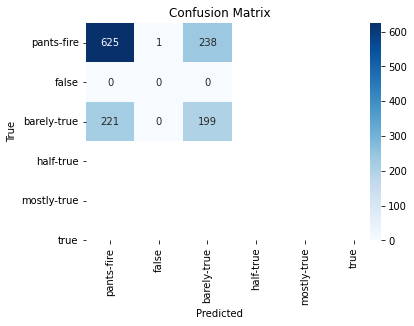

In [55]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(valid_true, valid_pred, zero_division=0))
cm = confusion_matrix(valid_true, valid_pred)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       false       0.72      0.73      0.72       818
        true       0.49      0.48      0.49       449

    accuracy                           0.64      1267
   macro avg       0.61      0.61      0.61      1267
weighted avg       0.64      0.64      0.64      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

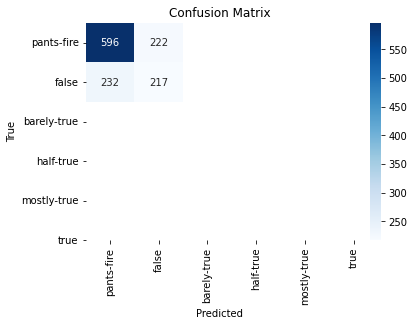

In [56]:
# print classification report and confusion matrix as a heatmap for test set 
print(classification_report(test_true, test_pred, zero_division=0))
cm = confusion_matrix(test_true, test_pred)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
# print all content in pd column
pd.set_option('display.max_colwidth', None)

In [60]:
test_results.loc[~test_results.prediction.isin(["true", "false"]) ,['statement','label','prediction']].T

""
statement
label
prediction


In [62]:
valid_results.loc[~valid_results.prediction.isin(["true", "false"]) ,['statement','label','prediction']].T

,126
statement,Tell me what Madeleine Albrights position was on the War on Iraq. I wouldnt be surprised if she supported it.
label,false
prediction,"this is not a statement, so it cannot be classified as either true or false."


              precision    recall  f1-score   support

       false       0.67      1.00      0.80       864
        true       0.00      0.00      0.00       420

    accuracy                           0.67      1284
   macro avg       0.34      0.50      0.40      1284
weighted avg       0.45      0.67      0.54      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

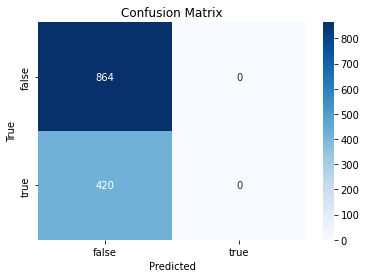

In [63]:
# Get the most used label in valid set and use it as a baseline. 
majority_label = np.unique(valid_true, return_counts=True)[0][np.argmax(np.unique(valid_true, return_counts=True)[1])]
valid_baseline = [majority_label for i in range(len(valid_true))]

# Get the most used label in test set and use it as a baseline.
majority_label = np.unique(test_true, return_counts=True)[0][np.argmax(np.unique(test_true, return_counts=True)[1])]
test_baseline = [majority_label for i in range(len(test_true))]

# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_true, valid_baseline, zero_division=0))
cm = confusion_matrix(valid_true, valid_baseline)
labels = ['false','true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



              precision    recall  f1-score   support

       false       0.65      1.00      0.78       818
        true       0.00      0.00      0.00       449

    accuracy                           0.65      1267
   macro avg       0.32      0.50      0.39      1267
weighted avg       0.42      0.65      0.51      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

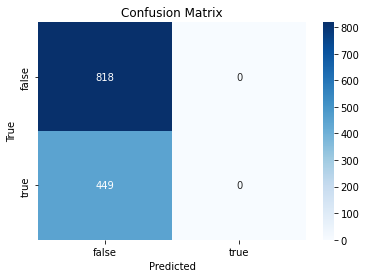

In [64]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_true, test_baseline, zero_division=0))
cm = confusion_matrix(test_true, test_baseline)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
# More examples

In [67]:
from few_shot.cgpt import *

In [68]:
print(get_prompt(test.head(1).statement.values[0], binary=True))

Classify the validity of the following statements as either 'false', or 'true'
Under Mayor Cicilline, [Providence] was a sanctuary city. => false
Hillary Clinton in 2005 co-sponsored legislation that would jail flag burners. => true
Only 2 percent of public high schools in the country offer PE classes. => false
Says U.S. Rep. Steve Southerland voted to keep the shutdown going. => true
Building a wall on the U.S.-Mexico border will take literally years. =>


In [69]:
calc_price(test, get_prompt("", binary=True),token_price=0.02/1000 )

2.9617400000000003

In [72]:
res = get_response(get_prompt(valid.head(1).statement.values[0], binary=True))

In [73]:
res

<OpenAIObject text_completion id=cmpl-6rkvnjNJPniKf38ubAw75Fu9f8Mbb at 0x7fe2723cf3b0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": " false"
    }
  ],
  "created": 1678269807,
  "id": "cmpl-6rkvnjNJPniKf38ubAw75Fu9f8Mbb",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 1,
    "prompt_tokens": 106,
    "total_tokens": 107
  }
}

In [74]:
get_label(res)

'false'

In [75]:
valid_results = get_label_from_df(valid, binary=True)
valid_results.to_csv('few_shot_4x_cgpt_valid_results.csv')

In [76]:
test_results = get_label_from_df(test, binary=True)
test_results.to_csv('few_shot_4x_cgpt_test_results.csv')

# Results overview

In [77]:
# import pandas, np, matplotlib, and from sklearn import classification report, accuracy, f1, confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


In [78]:
labels_map = {'pants-fire': "false", 'false':"false", 'barely-true':"false", 'half-true':"false", 'mostly-true':"true", 'true':"true"}
valid_results["label"] = valid["label"].map(labels_map)
test_results["label"] = test["label"].map(labels_map)

In [79]:
valid_true = valid_results.label.values
valid_pred = valid_results.prediction.values

test_true = test_results.label.values
test_pred = test_results.prediction.values

In [80]:
np.unique(valid_pred, return_counts=True)

(array(['false', 'true'], dtype=object), array([1018,  266]))

In [81]:
np.unique(test_pred, return_counts=True)

(array(['false', 'true'], dtype=object), array([1000,  267]))

              precision    recall  f1-score   support

       false       0.71      0.84      0.77       864
        true       0.48      0.30      0.37       420

    accuracy                           0.66      1284
   macro avg       0.59      0.57      0.57      1284
weighted avg       0.64      0.66      0.64      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

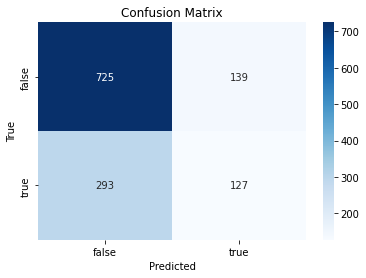

In [82]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(valid_true, valid_pred, zero_division=0))
cm = confusion_matrix(valid_true, valid_pred)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       false       0.69      0.85      0.76       818
        true       0.54      0.32      0.40       449

    accuracy                           0.66      1267
   macro avg       0.62      0.59      0.58      1267
weighted avg       0.64      0.66      0.64      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

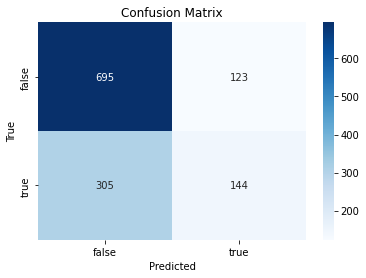

In [83]:
# print classification report and confusion matrix as a heatmap for test set 
print(classification_report(test_true, test_pred, zero_division=0))
cm = confusion_matrix(test_true, test_pred)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Setfit

In [13]:
from datasets import load_dataset
from datasets import Dataset
from sentence_transformers.losses import CosineSimilarityLoss

from setfit import SetFitModel, SetFitTrainer
import pandas as pd

In [23]:
train_df = pd.read_csv("../data/liar_dataset/few_shot/8x_train.csv", sep=";").rename(columns={"statement": "text", "label": "label"})
valid_df = valid[["statement", "label"]].rename(columns={"statement": "text"})
valid_df["label"] = valid_df["label"].map(labels_map)

test_df = test[["statement", "label"]].rename(columns={"statement": "text"})
test_df["label"] = test_df["label"].map(labels_map)
label2int_map = {"true":0, "false":1}
train_df["label"] = train_df["label"].apply(lambda x: label2int_map[str(x).lower()])
valid_df["label"] = valid_df["label"].apply(lambda x: label2int_map[str(x).lower()])
test_df["label"] = test_df["label"].apply(lambda x: label2int_map[x.lower()])

In [24]:
train_df

,text,label
0,"Under Mayor Cicilline, [Providence] was a sanctuary city.",1
1,Hillary Clinton in 2005 co-sponsored legislation that would jail flag burners.,0
2,Only 2 percent of public high schools in the country offer PE classes.,1
3,Says U.S. Rep. Steve Southerland voted to keep the shutdown going.,0
4,Americans spend 6.1 billion hours a year on tax preparation.,0
5,"Last year, Exxon pocketed nearly $4.7 million every hour.",0
6,"There are more African American men in prison, jail, on probation or parole than were enslaved in 1850.",0
7,Mark Warner voted for nearly $1 trillion in new taxes and $7 trillion in new debt.,0
8,Wisconsin is dead last in income growth among midwestern states during Gov. Scott Walkers term.,0
9,Says 51 percent of federal tax filers paid zero federal income tax.,0


In [26]:
valid_df.head()

,text,label
0,We have less Americans working now than in the 70s.,1
1,"When Obama was sworn into office, he DID NOT use the Holy Bible, but instead the Kuran (Their equivalency to our Bible, but very different beliefs).",1
2,Says Having organizations parading as being social welfare organizations and then being involved in the political combat harkens back to why the statute a hundred years ago said that they were prohibited.,1
3,Says nearly half of Oregons children are poor.,1
4,"On attacks by Republicans that various programs in the economic stimulus plan are not stimulative, ""If you add all that stuff up, it accounts for less than 1 percent of the overall package.""",1


In [27]:
test_df.head()

,text,label
0,Building a wall on the U.S.-Mexico border will take literally years.,0
1,Wisconsin is on pace to double the number of layoffs this year.,1
2,Says John McCain has done nothing to help the vets.,1
3,Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.,1
4,"When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.",1


In [28]:
train_ds = Dataset.from_pandas(train_df)
valid_ds = Dataset.from_pandas(valid_df)
test_ds = Dataset.from_pandas(test_df)

In [29]:
test_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 1267
})

In [32]:
# Load SetFit model from Hub
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2")

# Create trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=1, # Number of epochs to use for contrastive learning,
    samples_per_label=8
)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [33]:
# Train and evaluate!
trainer.train()

***** Running training *****
  Num examples = 640
  Num epochs = 1
  Total optimization steps = 40
  Total train batch size = 16
Epoch: 100%|██████████| 1/1 [04:12<00:00, 252.38s/it]


In [34]:
metrics = trainer.evaluate()

***** Running evaluation *****


In [35]:
metrics

{'accuracy': 0.5389408099688473}

In [46]:
preds = model.predict(test_df.text.values)

In [47]:
id2labels = {0: "true", 1: "false"}
preds = [id2labels[pred] for pred in preds.numpy()]


In [38]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [48]:
test_df.label

0       0
1       1
2       1
3       1
4       1
       ..
1262    1
1263    1
1264    1
1265    1
1266    1
Name: label, Length: 1267, dtype: int64

In [50]:
print(classification_report(test_df.label.map(id2labels), preds, zero_division=0))

              precision    recall  f1-score   support

       false       0.67      0.47      0.55       818
        true       0.37      0.57      0.45       449

    accuracy                           0.50      1267
   macro avg       0.52      0.52      0.50      1267
weighted avg       0.56      0.50      0.51      1267



In [51]:
print(accuracy_score(test_df.label.map(id2labels), preds))

0.5043409629044988


In [43]:
test.label

0              true
1             false
2             false
3         half-true
4        pants-fire
           ...     
1262      half-true
1263    barely-true
1264    barely-true
1265    barely-true
1266          false
Name: label, Length: 1267, dtype: object